In [1]:
import pandas as pd
import numpy as np
import boxes
import os

In [2]:
import random

In [3]:
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
os.listdir('results/grid50/')

['grid50_greedy_benchmark.txt',
 'grid50_memb_benchmark.txt',
 'grid50_mcwr_0.25_benchmark.txt',
 'grid50_merge_benchmark.txt',
 'grid50_mcwr_0.75_benchmark.txt',
 'grid50_remcc_benchmark.txt',
 'grid50_mcwr_0.5_benchmark.txt',
 'grid50_fuzzy_benchmark.txt',
 'grid50_obca_benchmark.txt',
 'grid50_random_sequential_benchmark.txt',
 'grid50_cbb_benchmark.txt']

In [5]:
def load_net(path='results/minnesota/'):

    files=os.listdir(path)
    
    nb_data={}
    ex_times={}
    
    for file in files:
        
        # get name of algorithm
        
        parts=file.split('_')
        if len(parts)==3:
            alg=parts[1]
        else:
            alg=parts[1]+'_'+parts[2]
            
        print(alg)
        
        # standard input
        
        exec_time, lb_nb_c=boxes.io_.canonized_lb_bench(path+file,alg)
        
        #repackage it as 
        
        for item in lb_nb_c:
            if item[0] in nb_data.keys():
                nb_data[item[0]][alg]=item[1]
                
            else:
                nb_data[item[0]]={alg:item[1]}
                
        ex_times[alg]=exec_time
            
    
    return nb_data,ex_times

In [6]:
nb_data={}
extimes={}
for net in ['grid50','uv225','shm4220','shm5210','minnesota','ecoli','enzyme','uv244','grid30']:
    nb_data[net],extimes[net]=load_net('results/'+net+'/')

greedy
memb
mcwr_0.25
merge
mcwr_0.75
remcc
mcwr_0.5
fuzzy
obca
random_sequential
cbb
mcwr_0.25
memb
mcwr_0.5
mcwr_0.75
merge
random_sequential
remcc
obca
cbb
fuzzy
greedy
mcwr_0.5
remcc
mcwr_0.75
cbb
memb
random_sequential
obca
mcwr_0.25
fuzzy
greedy
merge
mcwr_0.25
random_sequential
obca
cbb
memb
mcwr_0.75
mcwr_0.5
fuzzy
greedy
merge
remcc
cbb
mcwr_0.5
obca
memb
greedy
merge
random_sequential
fuzzy
mcwr_0.75
mcwr_0.25
remcc
cbb
merge
greedy
fuzzy
mcwr_0.75
remcc
random_sequential
obca
mcwr_0.25
mcwr_0.5
memb
remcc
memb
mcwr_0.25
merge
random_sequential
mcwr_0.5
mcwr_0.75
greedy
fuzzy
obca
cbb
fuzzy
memb
cbb
mcwr_0.5
obca
remcc
mcwr_0.25
merge
mcwr_0.75
random_sequential
greedy
mcwr_0.75
cbb
mcwr_0.5
merge
obca
random_sequential
mcwr_0.25
greedy
memb
remcc
fuzzy


In [7]:
nb_data['minnesota']

{3: {'cbb': array([891., 927., 909., 925., 907., 918., 909., 920., 921., 905., 915.,
         913., 914., 918., 921.]),
  'mcwr_0.5': array([962., 974., 980., 969., 964., 968., 973., 973., 982., 972., 965.,
         982., 979., 952., 972.]),
  'obca': array([827., 827., 827., 827., 827., 827., 827., 827., 827., 827., 827.,
         827., 827., 827., 827.]),
  'memb': array([844., 844., 844., 844., 844., 844., 844., 844., 844., 844., 844.,
         844., 844., 844., 844.]),
  'greedy': array([917., 919., 907., 929., 913., 918., 916., 905., 919., 911., 915.,
         920., 927., 917., 922.]),
  'merge': array([1113., 1110., 1116., 1117., 1106., 1111., 1130., 1111., 1121.,
         1112., 1107., 1129., 1114., 1114., 1115.]),
  'random_sequential': array([1147., 1138., 1133., 1110., 1146., 1115., 1115., 1121., 1123.,
         1126., 1126., 1124., 1113., 1119., 1114.]),
  'mcwr_0.75': array([901., 898., 899., 906., 897., 910., 892., 900., 899., 904., 901.,
         898., 902., 907., 905.]),

In [8]:
extimes['minnesota']

{'cbb': 459.00654911994934,
 'mcwr_0.5': 118.17983746528625,
 'obca': 496.25628328323364,
 'memb': 514.6076917648315,
 'greedy': 1479.484043598175,
 'merge': 55.70228600502014,
 'random_sequential': 9.47359585762024,
 'fuzzy': 228.77084374427795,
 'mcwr_0.75': 116.05176210403442,
 'mcwr_0.25': 117.74291181564331,
 'remcc': 375.3798794746399}

In [9]:
# benchmark will be minimal greedy result

benchmark_={}

for net in nb_data.keys():
    benchmark_[net]={}
    for box_size in nb_data[net].keys():
        if 'greedy' in nb_data[net][box_size].keys():
            benchmark_[net][box_size]=np.amin(nb_data[net][box_size]['greedy'])

In [10]:
benchmark_

{'grid50': {3: 706.0,
  5: 313.0,
  7: 173.0,
  9: 115.0,
  11: 76.0,
  13: 60.0,
  17: 36.0,
  23: 21.0,
  29: 15.0,
  37: 9.0,
  47: 6.0,
  59: 5.0,
  75: 3.0,
  95: 2.0,
  121: 1.0},
 'uv225': {3: 164.0,
  7: 42.0,
  11: 12.0,
  15: 9.0,
  19: 4.0,
  23: 3.0,
  27: 3.0,
  31: 4.0,
  35: 1.0},
 'shm4220': {3: 205.0,
  5: 121.0,
  7: 101.0,
  9: 46.0,
  11: 35.0,
  13: 27.0,
  17: 18.0,
  21: 17.0,
  25: 16.0,
  33: 5.0,
  41: 5.0,
  51: 4.0,
  65: 3.0,
  81: 2.0,
  103: 1.0},
 'shm5210': {3: 674.0,
  5: 631.0,
  7: 462.0,
  11: 156.0,
  15: 135.0,
  19: 105.0,
  27: 35.0,
  37: 29.0,
  51: 27.0,
  71: 22.0,
  99: 7.0,
  137: 7.0,
  191: 3.0,
  263: 3.0,
  365: 3.0,
  505: 1.0},
 'minnesota': {3: 905.0,
  5: 472.0,
  7: 293.0,
  9: 193.0,
  11: 126.0,
  13: 95.0,
  17: 59.0,
  23: 30.0,
  29: 19.0,
  37: 12.0,
  47: 6.0,
  59: 4.0,
  75: 3.0,
  95: 2.0,
  123: 1.0},
 'ecoli': {3: 622.0,
  5: 138.0,
  7: 47.0,
  9: 14.0,
  11: 7.0,
  13: 4.0,
  15: 3.0,
  17: 2.0,
  19: 1.0},
 'enzyme'

In [28]:
# nb_data: global variable

# goodness is (mean_of_NBs(net,box size, alg)-benchmark(net,box size))/benchmark(net, boxsize)

def goodness(net):
    
    boxes_=sorted(list(benchmark_[net].keys()))
    val_algs=sorted(list(nb_data[net][boxes_[0]].keys()))
    
    if 'fuzzy' in val_algs:
        val_algs.remove('fuzzy')
    
    goodness=np.zeros((len(val_algs),len(boxes_)),float)
    
    for a_index,alg in enumerate(val_algs):
        for b_index, bsize in enumerate(boxes_):
            goodness[a_index,b_index]=(np.mean(nb_data[net][bsize][alg])-benchmark_[net][bsize])/benchmark_[net][bsize]
    
    return goodness,boxes_,val_algs

In [29]:
# aggregate for no_boxes>=benchno

def mean_g_std(net,min_benchno,boxes,algs):
    
    mean_gs=np.zeros(len(algs),float)
    std_gs=np.zeros(len(algs),float)
    
    for a_ind,alg in enumerate(algs):
        dataset=[]
        
        n=0
        
        for size in boxes:
            if benchmark_[net][size]<min_benchno:
                continue
            else:
                # append goodness of net-size_alg for every Nb
                dataset.append((nb_data[net][size][alg]-benchmark_[net][size])/benchmark_[net][size])
                n+=1
     
        mean_gs[a_ind]=np.mean(np.array(dataset))
        std_gs[a_ind]=np.std(np.array(dataset))
        
    return mean_gs,std_gs,n
    

In [39]:
def plot_balls(net,alg_list,mean_list,std_list,x_offset,y_offset,noboxes=-1,boxthreshold=-1):
    
    plt.figure(figsize=(12,12))
    for index,alg in enumerate(alg_list):

        plt.scatter([extimes[net][alg]],[mean_list[index]],label=alg,
                    c='darkgreen',s=(std_list[index]**2)*20000,alpha=0.6)
        
        print(alg+' - mean: '+str(mean_list[index])+'; std dev: '+str(std_list[index])+'\n')

        plt.text(extimes[net][alg]+x_offset[alg],
                 mean_list[index]+y_offset[alg],alg)

    plt.title(net+', box threshold:'+str(boxthreshold)+', box no: '+str(noboxes))
    plt.xlabel('time (s)')
    plt.ylabel('mean goodness score')
    plt.axhline(0)
    plt.savefig('evaluation/'+net+'_boxthrs_'+str(boxthreshold)+'.png')
#     plt.xscale("log")
#     plt.yscale('log')
    
    

In [49]:
def plot_balls2(net,alg_list,mean_list,std_list,x_offset,y_offset,noboxes=-1,boxthreshold=-1):
    
    plt.figure(figsize=(12,12))
    for index,alg in enumerate(alg_list):

        plt.scatter([extimes[net][alg]],[mean_list[index]],label=alg,
                    c='darkgreen',s=(std_list[index]**2)*20000,alpha=0.6)
        
        print(alg+' - mean: '+str(mean_list[index])+'; std dev: '+str(std_list[index])+'\n')

        plt.text(extimes[net][alg]+x_offset[alg],
                 mean_list[index]+y_offset[alg],alg,size=12,weight='semibold')

    plt.title(net+', box threshold:'+str(boxthreshold)+', box no: '+str(noboxes),fontsize=16)
    plt.xlabel('time (s)',fontsize=13)
    plt.ylabel('mean goodness score',fontsize=13)
    plt.axhline(0)
    plt.savefig('evaluation/'+net+'_boxthrs_'+str(boxthreshold)+'.png')
#     plt.xscale("log")
#     plt.yscale('log')
    
    

In [24]:
help(plt.text)

Help on function text in module matplotlib.pyplot:

text(x, y, s, fontdict=None, **kwargs)
    Add text to the axes.
    
    Add the text *s* to the axes at location *x*, *y* in data coordinates.
    
    Parameters
    ----------
    x, y : float
        The position to place the text. By default, this is in data
        coordinates. The coordinate system can be changed using the
        *transform* parameter.
    
    s : str
        The text.
    
    fontdict : dict, default: None
        A dictionary to override the default text properties. If fontdict
        is None, the defaults are determined by `.rcParams`.
    
    Returns
    -------
    `.Text`
        The created `.Text` instance.
    
    Other Parameters
    ----------------
    **kwargs : `~matplotlib.text.Text` properties.
        Other miscellaneous text parameters.
    
        Properties:
        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
     

In [26]:
def wrapup(net,box_threshold):
    
    g_net,b_net,a_net=goodness(net)
    
    plt.figure(figsize=(12,12))
    sns.heatmap(g_net,annot=True,yticklabels=a_net,xticklabels=b_net,vmin=np.amin(g_net),vmax=1,cmap='viridis')
    plt.savefig('evaluation/'+net+'mean_goodness_score.png')
    plt.show()
    
    mean_net,std_net,nbox=mean_g_std(net,box_threshold,b_net,a_net)
    
    plot_balls(net,a_net,mean_net,std_net,x_offset,y_offset,noboxes=nbox,boxthreshold=box_threshold)
    
    results=pd.DataFrame({'algorithm':a_net,'mean goodness score':mean_net,'std dev of goodness':std_net})
    
    results.to_csv('evaluation/'+net+'aggregated_data.csv',index=False,sep=',')
    
    return results
    

In [38]:
def wrapup2(net,box_threshold):
    
    g_net,b_net,a_net=goodness(net)
    
    mean_net,std_net,nbox=mean_g_std(net,box_threshold,b_net,a_net)
    
    plot_balls2(net,a_net,mean_net,std_net,x_offset,y_offset,noboxes=nbox,boxthreshold=box_threshold)
    
    

cbb - mean: 0.055354983982188084; std dev: 0.066926240794428

greedy - mean: 0.05912032001266818; std dev: 0.0602022773703931

mcwr_0.25 - mean: 0.40232988103244355; std dev: 0.27922228410042593

mcwr_0.5 - mean: 0.19162959166096083; std dev: 0.1340982682229945

mcwr_0.75 - mean: 0.051164342659398385; std dev: 0.08270292814021112

memb - mean: -0.05624634825271691; std dev: 0.09890326521709247

merge - mean: 0.2082294764952191; std dev: 0.38942467189969193

obca - mean: -0.13634487042020463; std dev: 0.09142699758828579

random_sequential - mean: 0.6624680117430647; std dev: 0.671776892393

remcc - mean: -0.04587166546424102; std dev: 0.1054383395960996



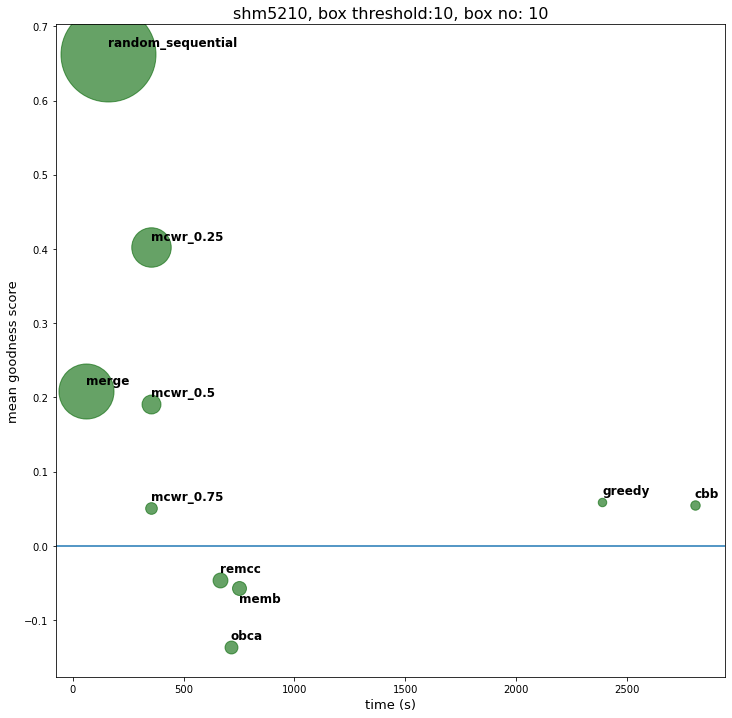

In [50]:
wrapup2('shm5210',10)

In [35]:
y_offset={}
x_offset={}

for alg in a_ecoli:
    x_offset[alg]=0.01
    y_offset[alg]=0.01
    
y_offset['memb']=-0.02

    

In [32]:
g_ecoli,b_ecoli,a_ecoli=goodness('ecoli')

In [113]:
nb_data['ecoli']

{3: {'cbb': array([632., 629., 628., 631., 629., 623., 641., 626., 628., 627., 622.,
         638., 630., 636., 630.]),
  'merge': array([1159., 1149., 1137., 1148., 1157., 1136., 1149., 1157., 1149.,
         1146., 1144., 1146., 1158., 1157., 1155.]),
  'greedy': array([633., 630., 622., 631., 626., 628., 632., 630., 630., 626., 633.,
         626., 630., 629., 630.]),
  'mcwr_0.75': array([658., 671., 670., 672., 680., 676., 673., 678., 667., 675., 675.,
         672., 676., 677., 673.]),
  'remcc': array([977., 977., 977., 977., 977., 977., 977., 977., 977., 977., 977.,
         977., 977., 977., 977.]),
  'random_sequential': array([1624., 1570., 1529., 1602., 1563., 1541., 1491., 1495., 1565.,
         1569., 1540., 1569., 1601., 1552., 1535.]),
  'obca': array([609., 609., 609., 609., 609., 609., 609., 609., 609., 609., 609.,
         609., 609., 609., 609.]),
  'mcwr_0.25': array([781., 793., 785., 773., 802., 780., 790., 787., 777., 794., 780.,
         775., 803., 792., 785.]

In [114]:
benchmark_['enzyme']

{3: 44.0,
 7: 16.0,
 11: 9.0,
 15: 7.0,
 19: 3.0,
 23: 4.0,
 27: 3.0,
 31: 2.0,
 35: 1.0}

In [35]:
for netw__ in networks_:
    g___,b____,a____=goodness('ecoli')

[array([0.01607717, 0.01125402, 0.0096463 , 0.01446945, 0.01125402,
       0.00160772, 0.03054662, 0.00643087, 0.0096463 , 0.00803859,
       0.        , 0.02572347, 0.01286174, 0.02250804, 0.01286174]), array([0.02898551, 0.00724638, 0.01449275, 0.04347826, 0.        ,
       0.07971014, 0.04347826, 0.02898551, 0.02173913, 0.00724638,
       0.04347826, 0.04347826, 0.04347826, 0.02173913, 0.02898551]), array([0.12765957, 0.08510638, 0.04255319, 0.0212766 , 0.10638298,
       0.06382979, 0.06382979, 0.0212766 , 0.17021277, 0.06382979,
       0.08510638, 0.08510638, 0.06382979, 0.04255319, 0.10638298]), array([0.07142857, 0.14285714, 0.14285714, 0.07142857, 0.14285714,
       0.07142857, 0.21428571, 0.21428571, 0.14285714, 0.21428571,
       0.21428571, 0.14285714, 0.        , 0.14285714, 0.14285714])]
[array([0.01768489, 0.01286174, 0.        , 0.01446945, 0.00643087,
       0.0096463 , 0.01607717, 0.01286174, 0.01286174, 0.00643087,
       0.01768489, 0.00643087, 0.01286174, 0.0112540

ValueError: too many values to unpack (expected 2)

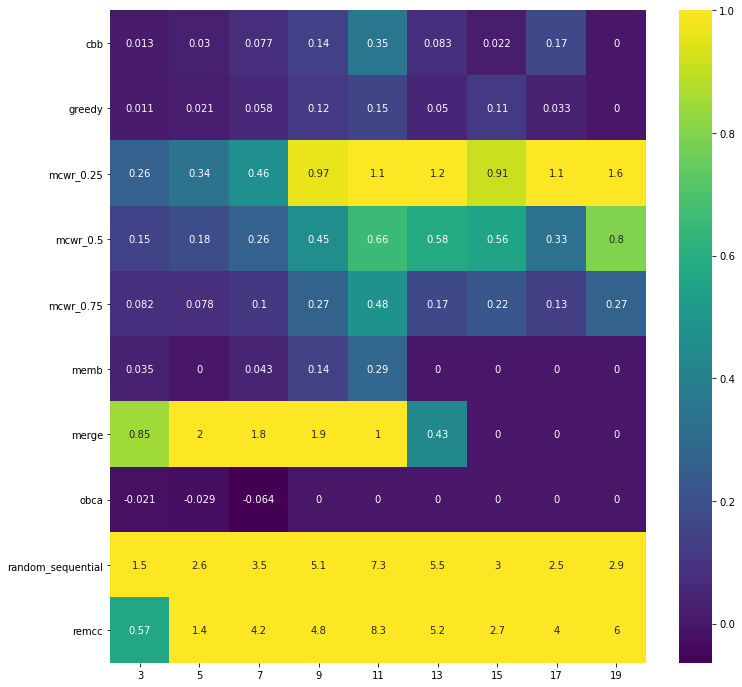

cbb - mean: 0.06449687542979748; std dev: 0.06133751191517641

greedy - mean: 0.05245522162312023; std dev: 0.05535144803678329

mcwr_0.25 - mean: 0.5083976238375076; std dev: 0.3061294576210225

mcwr_0.5 - mean: 0.260584405132891; std dev: 0.14313373355207187

mcwr_0.75 - mean: 0.13244243764870434; std dev: 0.09412472511663347

memb - mean: 0.05519502731652968; std dev: 0.053113073219337316

merge - mean: 1.6335925314658388; std dev: 0.4621696053149103

obca - mean: -0.02842890400595693; std dev: 0.02301311841847551

random_sequential - mean: 3.1754621180240847; std dev: 1.4780259102093416

remcc - mean: 2.738550708348754; std dev: 1.7789532832642634



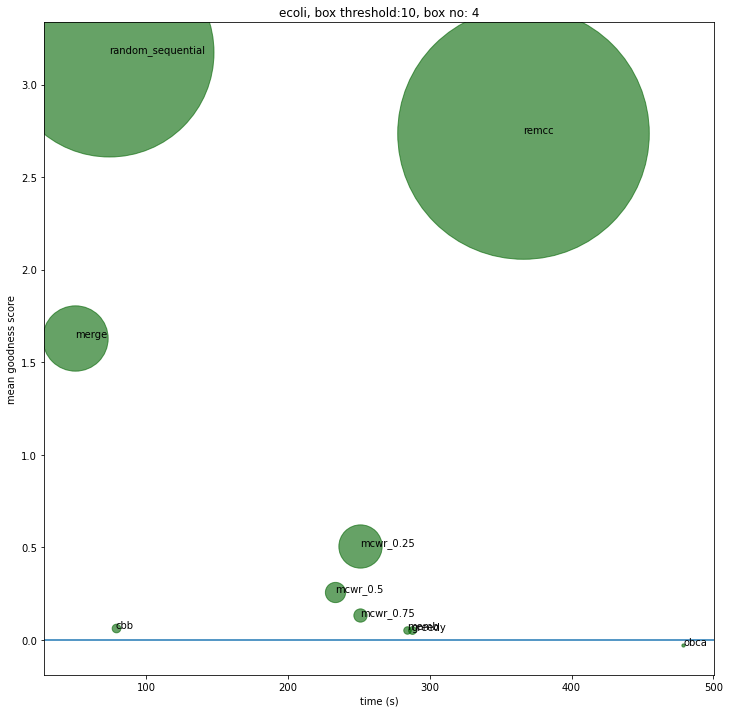

In [40]:
df=wrapup('ecoli',10)

In [ ]:
x_offset['obca']=0
y_offset['greedy']=0
y_offset['memb']=0

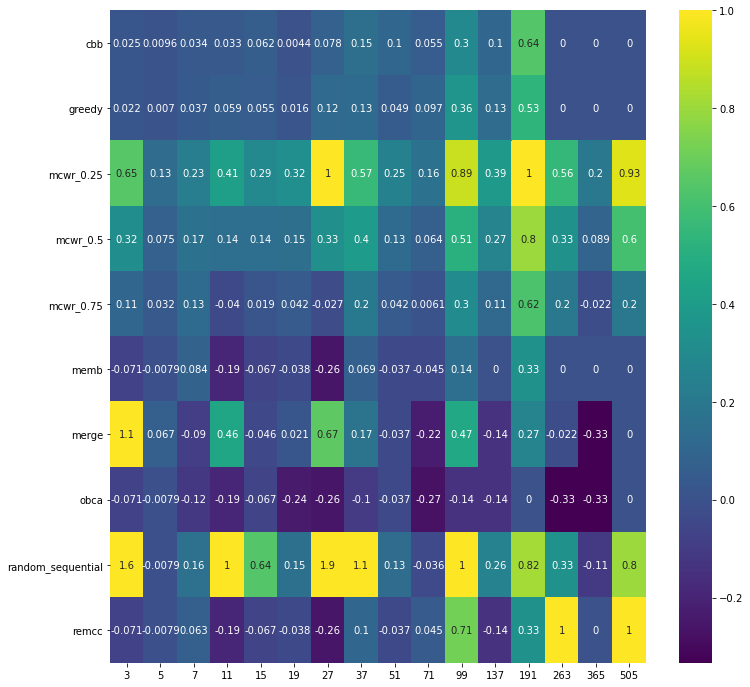

cbb - mean: 0.055354983982188084; std dev: 0.066926240794428

greedy - mean: 0.05912032001266818; std dev: 0.0602022773703931

mcwr_0.25 - mean: 0.40232988103244355; std dev: 0.27922228410042593

mcwr_0.5 - mean: 0.19162959166096083; std dev: 0.1340982682229945

mcwr_0.75 - mean: 0.051164342659398385; std dev: 0.08270292814021112

memb - mean: -0.05624634825271691; std dev: 0.09890326521709247

merge - mean: 0.2082294764952191; std dev: 0.38942467189969193

obca - mean: -0.13634487042020463; std dev: 0.09142699758828579

random_sequential - mean: 0.6624680117430647; std dev: 0.671776892393

remcc - mean: -0.04587166546424102; std dev: 0.1054383395960996



,algorithm,mean goodness score,std dev of goodness
0,cbb,0.055355,0.066926
1,greedy,0.059120,0.060202
2,mcwr_0.25,0.402330,0.279222
3,mcwr_0.5,0.191630,0.134098
4,mcwr_0.75,0.051164,0.082703
5,memb,-0.056246,0.098903
6,merge,0.208229,0.389425
7,obca,-0.136345,0.091427
8,random_sequential,0.662468,0.671777
9,remcc,-0.045872,0.105438


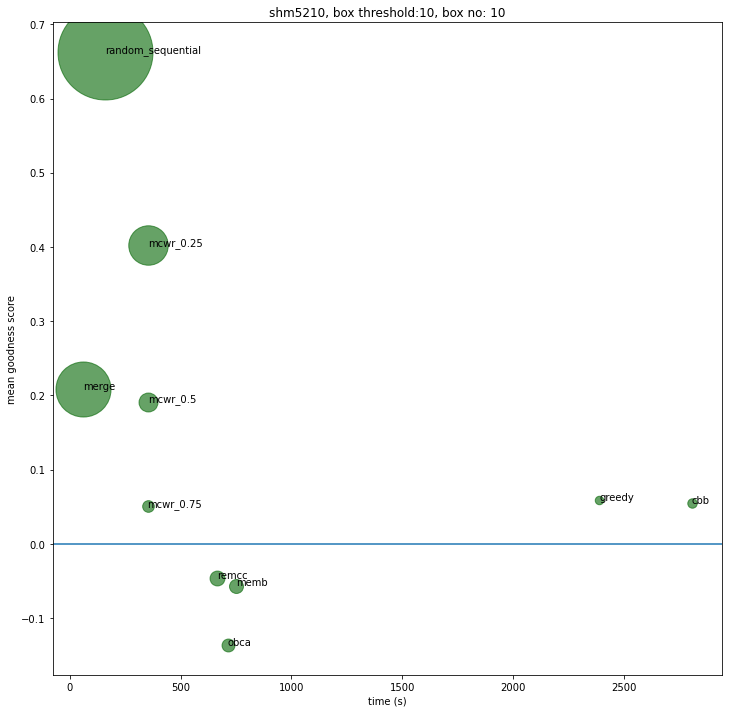

In [41]:
wrapup('shm5210',10)

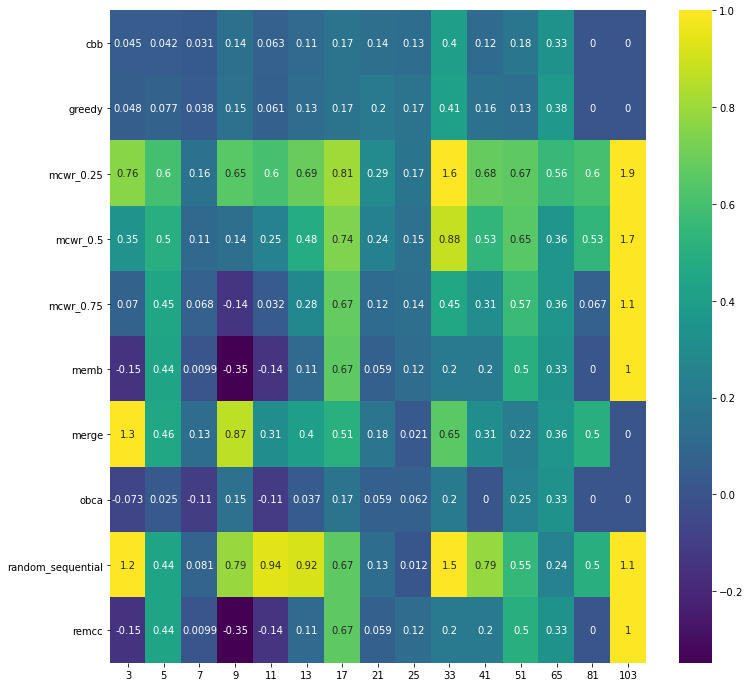

cbb - mean: 0.09666491286190938; std dev: 0.08177941125024882

greedy - mean: 0.11528010172087794; std dev: 0.089285562440056

mcwr_0.25 - mean: 0.5252191484319743; std dev: 0.25481143680074253

mcwr_0.5 - mean: 0.3274848037749498; std dev: 0.21203368456663174

mcwr_0.75 - mean: 0.18789978441290325; std dev: 0.23536367134058933

memb - mean: 0.08529067602282062; std dev: 0.2918560978061488

merge - mean: 0.46435756562645997; std dev: 0.38371073178469584

obca - mean: 0.022847466389617613; std dev: 0.09767650212472434

random_sequential - mean: 0.5785133731388259; std dev: 0.41625052693554376

remcc - mean: 0.08529067602282062; std dev: 0.2918560978061488



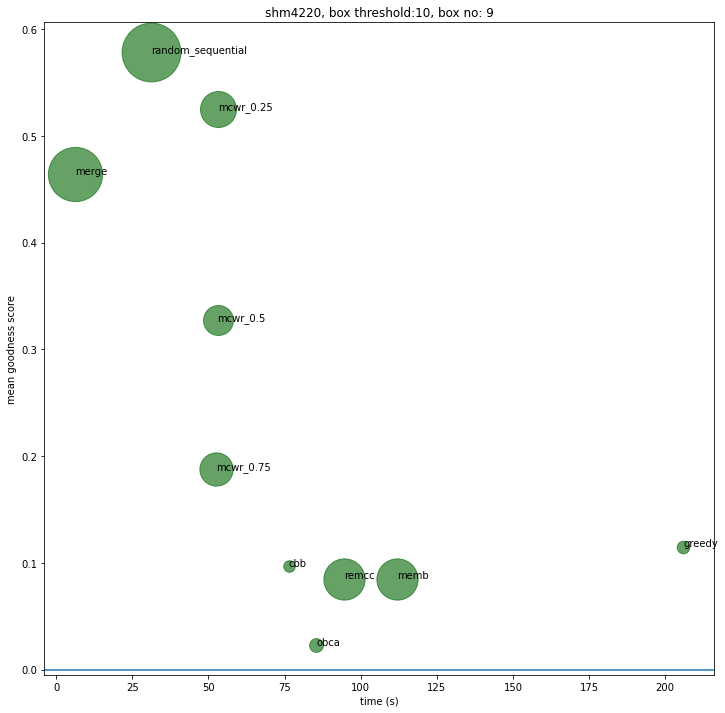

In [42]:
df=wrapup('shm4220',10)

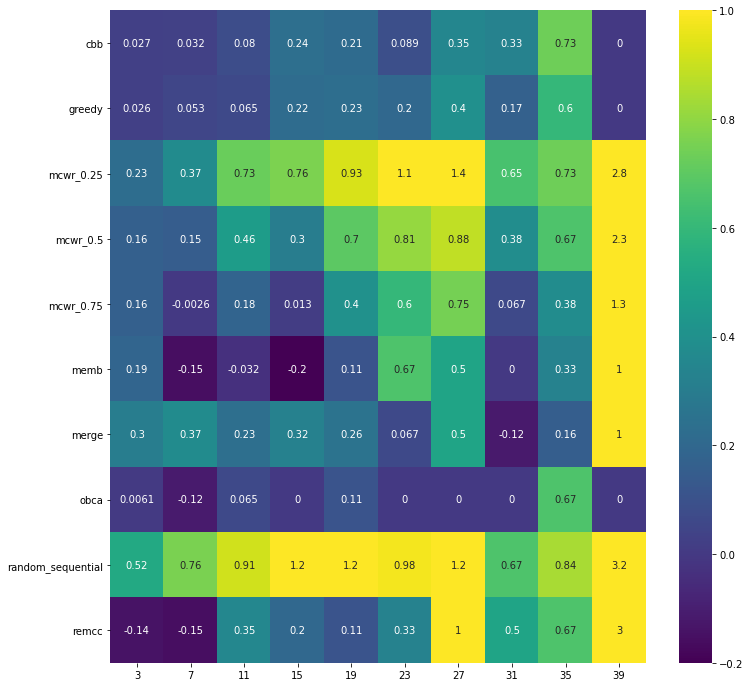

cbb - mean: 0.09342493356563362; std dev: 0.10421141295259499

greedy - mean: 0.09035629435766704; std dev: 0.10681812356228933

mcwr_0.25 - mean: 0.5226919054407044; std dev: 0.2638273579812812

mcwr_0.5 - mean: 0.2681326307338662; std dev: 0.16475500399351006

mcwr_0.75 - mean: 0.08896874002227469; std dev: 0.1117238902768302

memb - mean: -0.0501734710039446; std dev: 0.14917833714360904

merge - mean: 0.30903755437729347; std dev: 0.06399568299142332

obca - mean: -0.011197364749183557; std dev: 0.06521382337558498

random_sequential - mean: 0.8500425632477795; std dev: 0.26293387813144714

remcc - mean: 0.06453385324353068; std dev: 0.21984587746093073



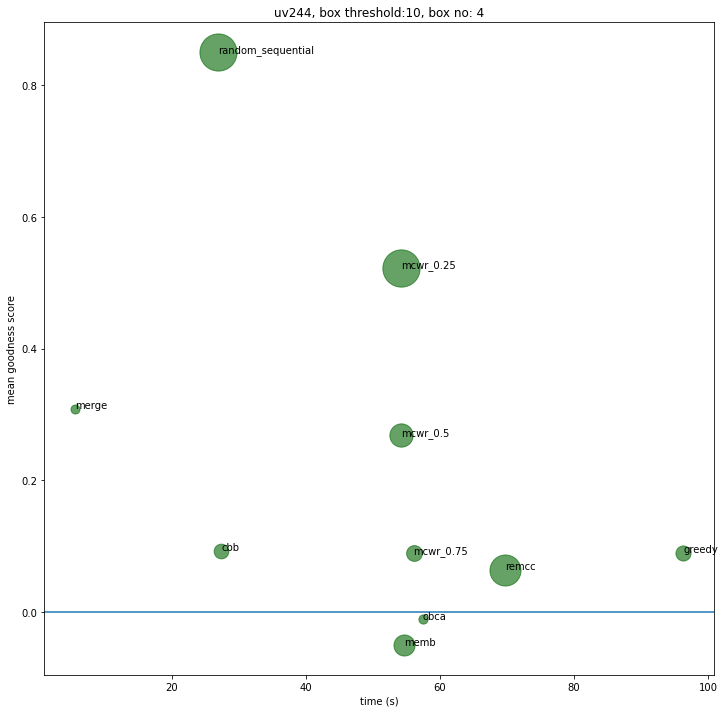

In [43]:
df=wrapup('uv244',10)

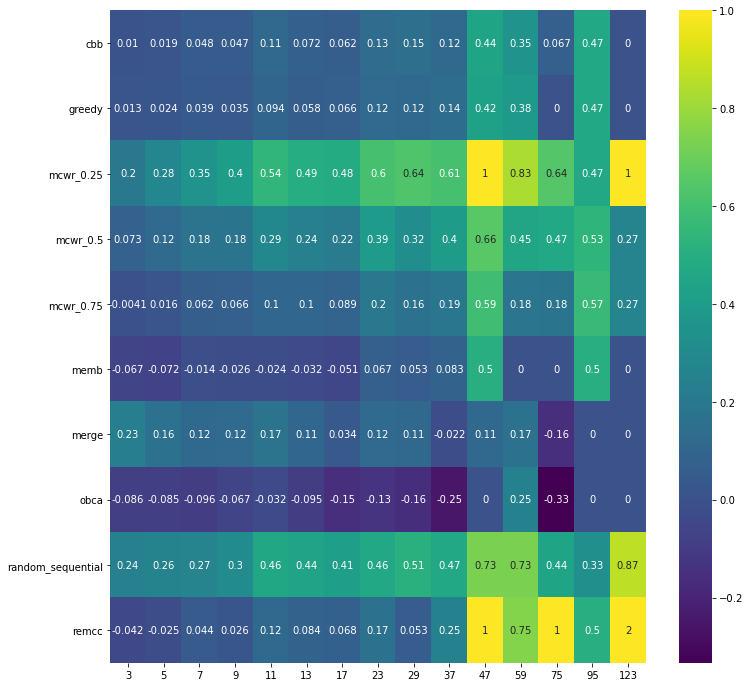

cbb - mean: 0.07666611545256673; std dev: 0.06687333345299383

greedy - mean: 0.07075910821993338; std dev: 0.06644938733970573

mcwr_0.25 - mean: 0.4594825622328638; std dev: 0.16416832352307315

mcwr_0.5 - mean: 0.24105991414497022; std dev: 0.1298564485432128

mcwr_0.75 - mean: 0.09902995040684576; std dev: 0.08774473118731486

memb - mean: -0.008260017596430807; std dev: 0.0531186430981755

merge - mean: 0.1158840224801178; std dev: 0.07817256468225094

obca - mean: -0.11541075778089298; std dev: 0.0579169130161508

random_sequential - mean: 0.3832312574768919; std dev: 0.11315149139164819

remcc - mean: 0.07432156584910218; std dev: 0.08289765237165343



,algorithm,mean goodness score,std dev of goodness
0,cbb,0.076666,0.066873
1,greedy,0.070759,0.066449
2,mcwr_0.25,0.459483,0.164168
3,mcwr_0.5,0.241060,0.129856
4,mcwr_0.75,0.099030,0.087745
5,memb,-0.008260,0.053119
6,merge,0.115884,0.078173
7,obca,-0.115411,0.057917
8,random_sequential,0.383231,0.113151
9,remcc,0.074322,0.082898


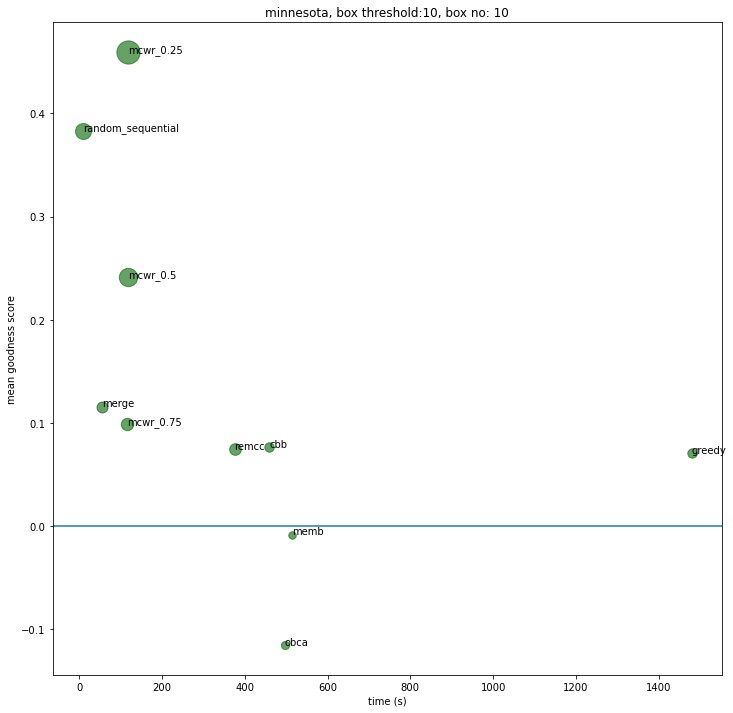

In [44]:
wrapup('minnesota',10)

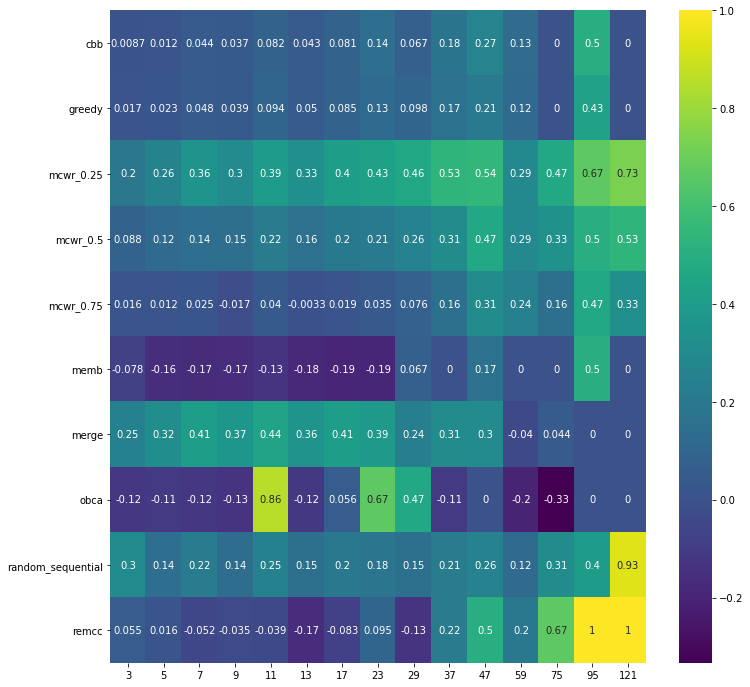

cbb - mean: 0.05756183520721815; std dev: 0.061290420977661145

greedy - mean: 0.06475586493901797; std dev: 0.06396366494596971

mcwr_0.25 - mean: 0.34774005005696323; std dev: 0.11834723456620155

mcwr_0.5 - mean: 0.17298705363008898; std dev: 0.07823144696672323

mcwr_0.75 - mean: 0.022408190645125985; std dev: 0.058728320930965

memb - mean: -0.13338521128331762; std dev: 0.07839162629607593

merge - mean: 0.3517911364678265; std dev: 0.07865988041806224

obca - mean: 0.1605804538918587; std dev: 0.3706909844100493

random_sequential - mean: 0.19393389402399805; std dev: 0.06906852748145306

remcc - mean: -0.038128824254777566; std dev: 0.07976852930002652



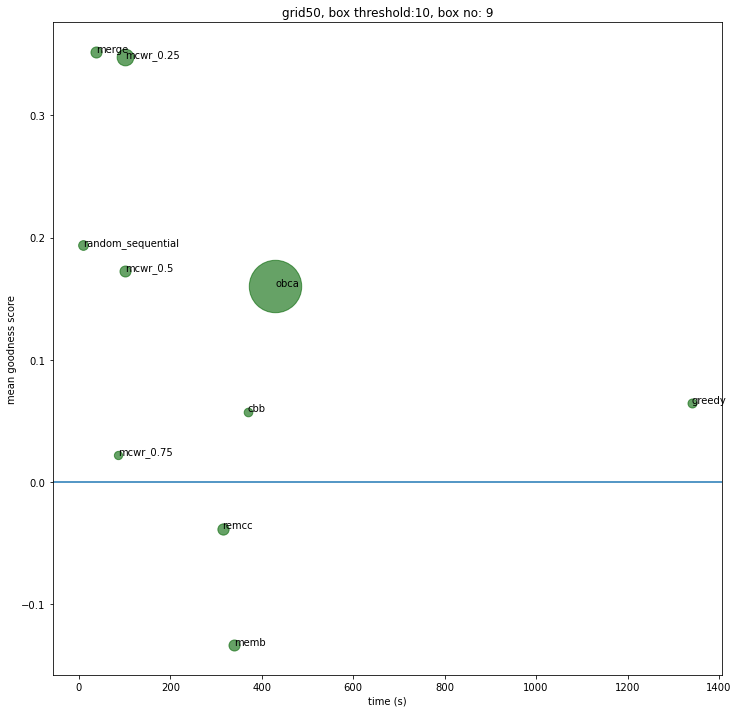

In [45]:
df=wrapup('grid50',10)

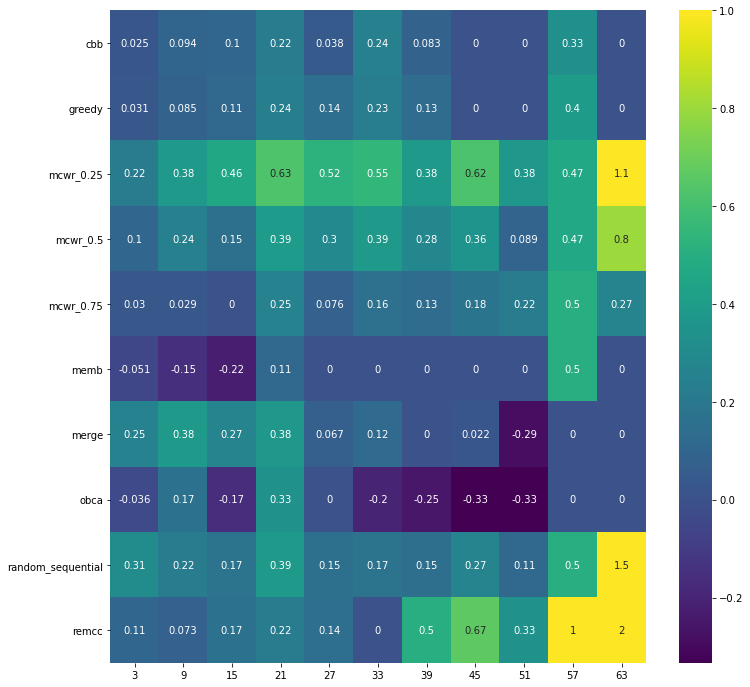

cbb - mean: 0.12047267266072495; std dev: 0.1274116028957637

greedy - mean: 0.1388424737876841; std dev: 0.12680418305616675

mcwr_0.25 - mean: 0.46025087516073726; std dev: 0.2513385994208122

mcwr_0.5 - mean: 0.26171557008248414; std dev: 0.21078918801393423

mcwr_0.75 - mean: 0.09126894183804753; std dev: 0.1555806922052031

memb - mean: -0.05147266228920524; std dev: 0.10792579465505849

merge - mean: 0.24459197846260416; std dev: 0.14640855822611498

obca - mean: 0.016970875242349262; std dev: 0.1859998154926739

random_sequential - mean: 0.23609419618256658; std dev: 0.11889353950126627

remcc - mean: 0.11860602184038026; std dev: 0.0706013526650729



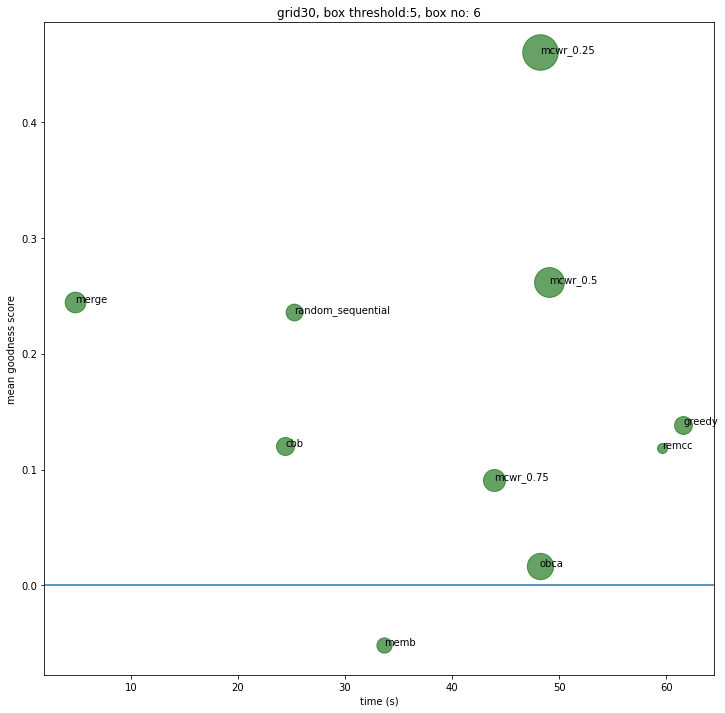

In [46]:
df=wrapup('grid30',5)

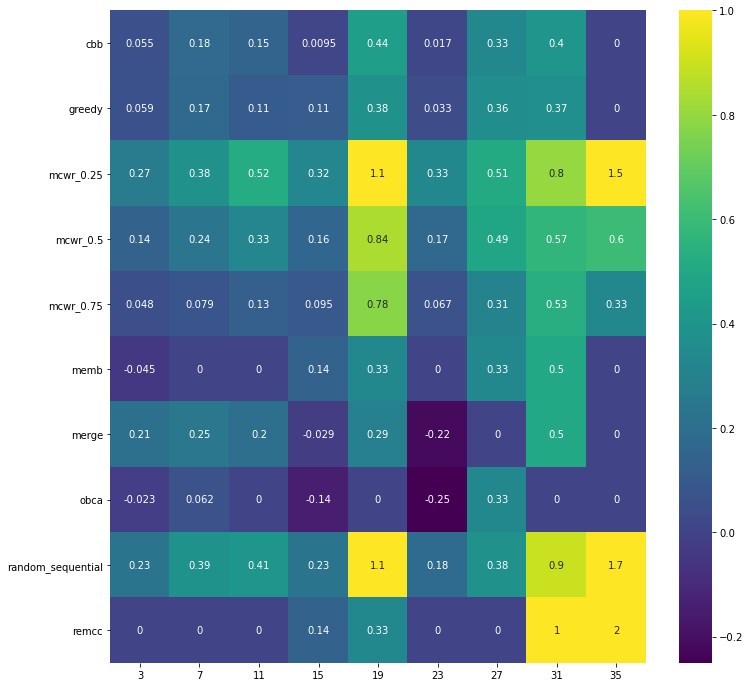

cbb - mean: 0.09680435305435306; std dev: 0.12554560672902385

greedy - mean: 0.11383026695526696; std dev: 0.08240584080865368

mcwr_0.25 - mean: 0.3724191317941317; std dev: 0.1806588221179127

mcwr_0.5 - mean: 0.21542358104858103; std dev: 0.1693452568206107

mcwr_0.75 - mean: 0.08720388407888409; std dev: 0.11011347358903509

memb - mean: 0.024350649350649345; std dev: 0.07089157649642223

merge - mean: 0.15620941558441556; std dev: 0.13117321586045247

obca - mean: -0.025771103896103893; std dev: 0.07445526006742377

random_sequential - mean: 0.31306667869167865; std dev: 0.1233634242657861

remcc - mean: 0.03571428571428571; std dev: 0.06185895741317418



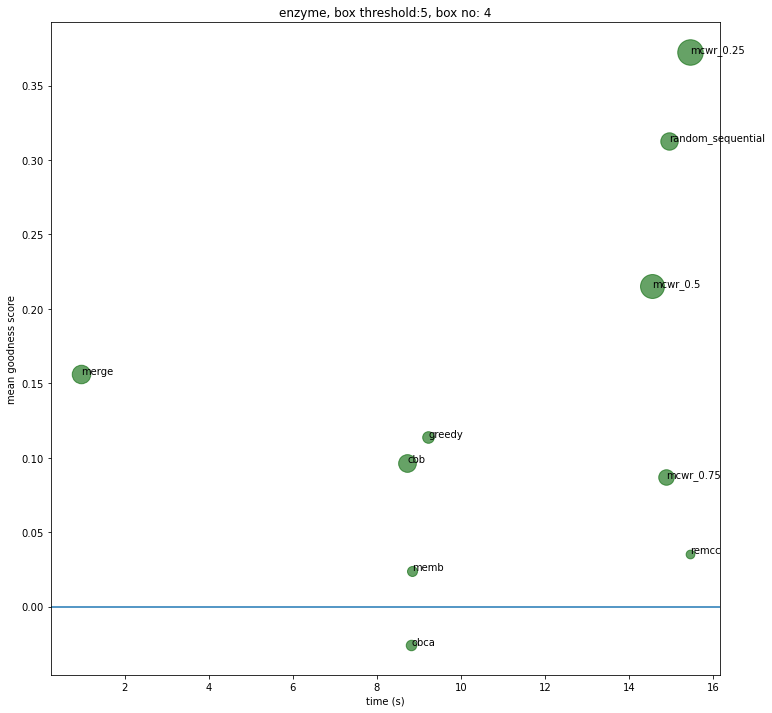

In [47]:
df=wrapup('enzyme',5)

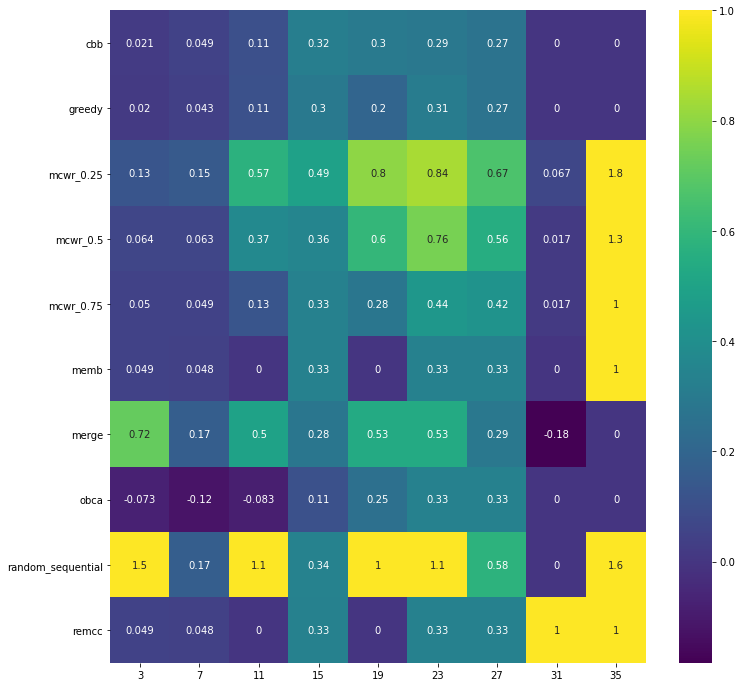

cbb - mean: 0.1235030326493741; std dev: 0.12838826651239618

greedy - mean: 0.11754581236288554; std dev: 0.1367672870301828

mcwr_0.25 - mean: 0.33490611691831196; std dev: 0.2476753972209521

mcwr_0.5 - mean: 0.21377274487030587; std dev: 0.17151668985295154

mcwr_0.75 - mean: 0.14007936507936508; std dev: 0.13007904711847182

memb - mean: 0.10743321718931471; std dev: 0.13190018591263641

merge - mean: 0.4175248419150857; std dev: 0.21892980020131195

obca - mean: -0.04111014324428957; std dev: 0.08952128172398072

random_sequential - mean: 0.7755645889792233; std dev: 0.5719264604346916

remcc - mean: 0.10743321718931471; std dev: 0.13190018591263641



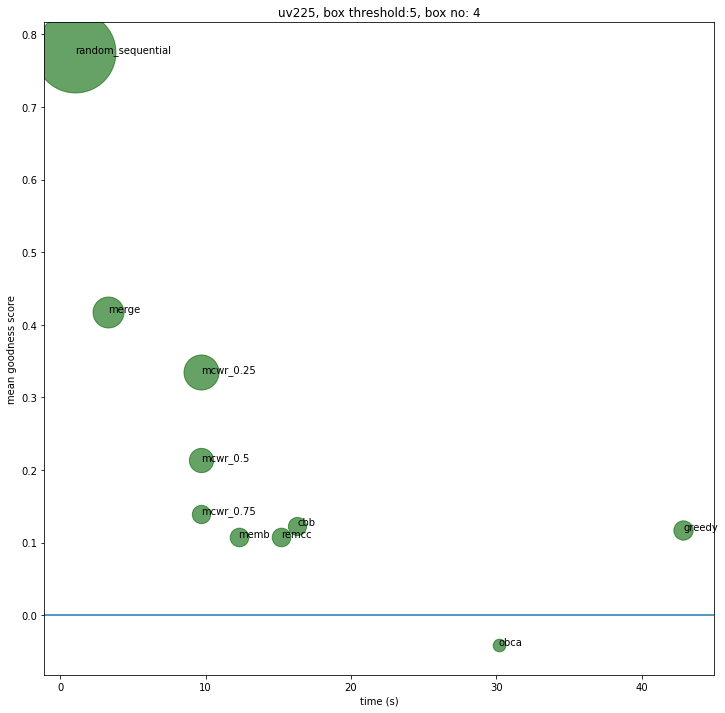

In [48]:
df=wrapup('uv225',5)

## Final figures

In [49]:
extimes

{'grid50': {'greedy': 1340.4744226932526,
  'memb': 338.7886106967926,
  'mcwr_0.25': 100.85214161872864,
  'merge': 36.56113958358765,
  'mcwr_0.75': 85.79180598258972,
  'remcc': 313.9867649078369,
  'mcwr_0.5': 101.2832407951355,
  'fuzzy': 214.50110626220703,
  'obca': 429.10757541656494,
  'random_sequential': 8.722263813018799,
  'cbb': 369.55242347717285},
 'uv225': {'mcwr_0.25': 9.701747179031372,
  'memb': 12.259022235870361,
  'mcwr_0.5': 9.683053493499756,
  'mcwr_0.75': 9.658226251602173,
  'merge': 3.3038671016693115,
  'random_sequential': 0.9838008880615234,
  'remcc': 15.158612251281738,
  'obca': 30.17813992500305,
  'cbb': 16.30113959312439,
  'fuzzy': 18.964152336120605,
  'greedy': 42.861886739730835},
 'shm4220': {'mcwr_0.5': 52.97493267059326,
  'remcc': 94.51215481758118,
  'mcwr_0.75': 52.489869117736816,
  'cbb': 76.40633130073547,
  'memb': 111.85516500473022,
  'random_sequential': 31.135491371154785,
  'obca': 85.40281319618225,
  'mcwr_0.25': 53.06820631027

In [79]:
for net in networks_:
    for boxsize in benchmark_[net].keys():
        for algo in algortihms_:
            if nb_data[net][boxsize][algo].shape!=(15,):
                print('bollocks')

In [59]:
network_no=9
algorithm_no=10

In [72]:
algortihms_

['cbb',
 'greedy',
 'mcwr_0.25',
 'mcwr_0.5',
 'mcwr_0.75',
 'memb',
 'merge',
 'obca',
 'random_sequential',
 'remcc']

In [60]:
networks_=sorted(list(extimes.keys()))
algortihms_=sorted(['merge','cbb','memb','mcwr_0.25','mcwr_0.5','mcwr_0.75',
                    'greedy','remcc','random_sequential','obca'])

In [61]:
extimes_toplot=np.zeros((algorithm_no,network_no),float)

In [62]:
for ina,algo in enumerate(algortihms_):
    for inn,neto in enumerate(networks_):
        extimes_toplot[ina,inn]=extimes[neto][algo]

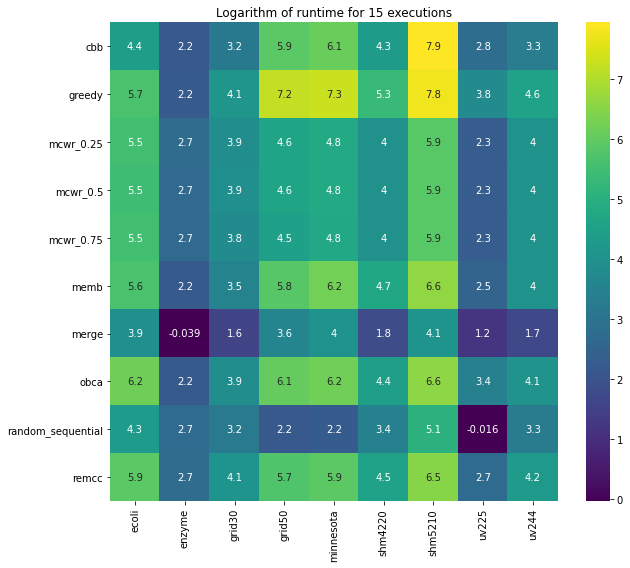

In [64]:
plt.figure(figsize=(9.5,8))
sns.heatmap(np.log(extimes_toplot),annot=True,xticklabels=networks_,yticklabels=algortihms_,cmap='viridis')
plt.title('Logarithm of runtime for 15 executions')
plt.tight_layout()
plt.savefig('times_logplot.png')
plt.show()


In [12]:
xtmsdf=pd.read_csv('plot_data/extimesdf.csv',sep=',',index_col=0)

In [13]:
xtmsdf

,ecoli,enzyme,grid30,grid50,minnesota,shm4220,shm5210,uv225,uv244
cbb,78.5,8.7,24.4,369.6,459.0,76.4,2805.5,16.3,27.4
greedy,287.3,9.2,61.6,1340.5,1479.5,206.0,2388.4,42.9,96.3
mcwr_0.25,250.8,15.4,48.2,100.9,117.7,53.1,355.3,9.7,54.2
mcwr_0.5,232.9,14.5,49.0,101.3,118.2,53.0,351.5,9.7,54.2
mcwr_0.75,250.7,14.9,43.9,85.8,116.1,52.5,351.3,9.7,56.0
memb,283.8,8.8,33.7,338.8,514.6,111.9,748.8,12.3,54.7
merge,49.3,1.0,4.7,36.6,55.7,6.0,60.0,3.3,5.5
obca,478.9,8.8,48.2,429.1,496.3,85.4,713.4,30.2,57.4
random_sequential,73.8,14.9,25.2,8.7,9.5,31.1,157.6,1.0,26.9
remcc,365.6,15.4,59.6,314.0,375.4,94.5,664.8,15.2,69.7


In [15]:
print(xtmsdf.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  ecoli &  enzyme &  grid30 &  grid50 &  minnesota &  shm4220 &  shm5210 &  uv225 &  uv244 \\
\midrule
cbb               &   78.5 &     8.7 &    24.4 &   369.6 &      459.0 &     76.4 &   2805.5 &   16.3 &   27.4 \\
greedy            &  287.3 &     9.2 &    61.6 &  1340.5 &     1479.5 &    206.0 &   2388.4 &   42.9 &   96.3 \\
mcwr\_0.25         &  250.8 &    15.4 &    48.2 &   100.9 &      117.7 &     53.1 &    355.3 &    9.7 &   54.2 \\
mcwr\_0.5          &  232.9 &    14.5 &    49.0 &   101.3 &      118.2 &     53.0 &    351.5 &    9.7 &   54.2 \\
mcwr\_0.75         &  250.7 &    14.9 &    43.9 &    85.8 &      116.1 &     52.5 &    351.3 &    9.7 &   56.0 \\
memb              &  283.8 &     8.8 &    33.7 &   338.8 &      514.6 &    111.9 &    748.8 &   12.3 &   54.7 \\
merge             &   49.3 &     1.0 &     4.7 &    36.6 &       55.7 &      6.0 &     60.0 &    3.3 &    5.5 \\
obca              &  478.9 &     8.8 &    48.2 &   429.1 &    

In [82]:
extimesdf=pd.DataFrame(extimes_toplot,index=algortihms_,columns=networks_)
print(extimesdf)

                        ecoli     enzyme     grid30       grid50    minnesota  \
cbb                 78.468268   8.718068  24.427808   369.552423   459.006549   
greedy             287.343937   9.221558  61.600629  1340.474423  1479.484044   
mcwr_0.25          250.772438  15.441800  48.176330   100.852142   117.742912   
mcwr_0.5           232.901816  14.541232  49.040527   101.283241   118.179837   
mcwr_0.75          250.743962  14.877355  43.899078    85.791806   116.051762   
memb               283.788890   8.837032  33.679404   338.788611   514.607692   
merge               49.293096   0.962108   4.734467    36.561140    55.702286   
obca               478.858392   8.814073  48.171228   429.107575   496.256283   
random_sequential   73.805991  14.944406  25.195191     8.722264     9.473596   
remcc              365.567291  15.439555  59.648980   313.986765   375.379879   

                      shm4220      shm5210      uv225      uv244  
cbb                 76.406331  2805.47210

In [83]:
extimesdf.to_csv('extimesdf.csv',sep=',',float_format='%.1f')

In [84]:
goodness_dfs=[fname for fname in os.listdir('evaluation/') if fname[-3:]=='csv']

In [96]:
algortihms_

['cbb',
 'greedy',
 'mcwr_0.25',
 'mcwr_0.5',
 'mcwr_0.75',
 'memb',
 'merge',
 'obca',
 'random_sequential',
 'remcc']

In [86]:
means_toplot=np.zeros((algorithm_no,network_no),float)
stds_toplot=np.zeros((algorithm_no,network_no),float)

In [93]:
networks_

['ecoli',
 'enzyme',
 'grid30',
 'grid50',
 'minnesota',
 'shm4220',
 'shm5210',
 'uv225',
 'uv244']

In [88]:
df_of_net={}

for fname in goodness_dfs:
    
    df_of_net[fname.split('aggregated')[0]]=fname
    
    

In [91]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [94]:
for netno,net in enumerate(networks_):
    df=pd.read_csv('evaluation/'+df_of_net[net],index_col='algorithm')
#     print(df.head())
    for algno,algo in enumerate(algortihms_):
        means_toplot[algno,netno]=df['mean goodness score'].loc[algo]
        stds_toplot[algno,netno]=df['std dev of goodness'].loc[algo]

In [95]:
means_toplot

array([[ 0.06449688,  0.09680435,  0.12047267,  0.05756184,  0.07666612,
         0.09666491,  0.05535498,  0.12350303,  0.09342493],
       [ 0.05245522,  0.11383027,  0.13884247,  0.06475586,  0.07075911,
         0.1152801 ,  0.05912032,  0.11754581,  0.09035629],
       [ 0.50839762,  0.37241913,  0.46025088,  0.34774005,  0.45948256,
         0.52521915,  0.40232988,  0.33490612,  0.52269191],
       [ 0.26058441,  0.21542358,  0.26171557,  0.17298705,  0.24105991,
         0.3274848 ,  0.19162959,  0.21377274,  0.26813263],
       [ 0.13244244,  0.08720388,  0.09126894,  0.02240819,  0.09902995,
         0.18789978,  0.05116434,  0.14007937,  0.08896874],
       [ 0.05519503,  0.02435065, -0.05147266, -0.13338521, -0.00826002,
         0.08529068, -0.05624635,  0.10743322, -0.05017347],
       [ 1.63359253,  0.15620942,  0.24459198,  0.35179114,  0.11588402,
         0.46435757,  0.20822948,  0.41752484,  0.30903755],
       [-0.0284289 , -0.0257711 ,  0.01697088,  0.16058045, -0

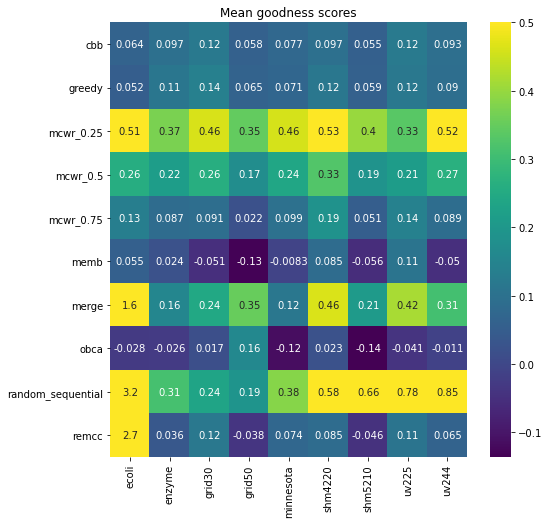

In [101]:
plt.figure(figsize=(8,8))
sns.heatmap(means_toplot,vmax=0.5,annot=True,xticklabels=networks_,yticklabels=algortihms_,cmap='viridis')
plt.title('Mean goodness scores')
plt.savefig('mgs_plot.png')
plt.show()


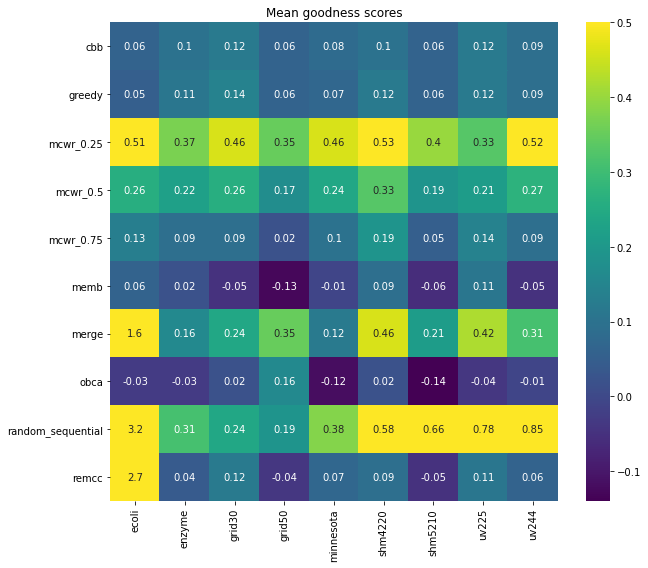

In [65]:
plt.figure(figsize=(9.5,8))
sns.heatmap(mntplt,vmax=0.5,annot=True,cmap='viridis')
plt.title('Mean goodness scores')
plt.tight_layout()
plt.savefig('mgs_plot.png')
plt.show()

In [17]:
mntplt=pd.read_csv('plot_data/mgs_plot.csv',sep=',',index_col=0)

In [20]:
print(mntplt.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  ecoli &  enzyme &  grid30 &  grid50 &  minnesota &  shm4220 &  shm5210 &  uv225 &  uv244 \\
\midrule
cbb               &   0.06 &    0.10 &    0.12 &    0.06 &       0.08 &     0.10 &     0.06 &   0.12 &   0.09 \\
greedy            &   0.05 &    0.11 &    0.14 &    0.06 &       0.07 &     0.12 &     0.06 &   0.12 &   0.09 \\
mcwr\_0.25         &   0.51 &    0.37 &    0.46 &    0.35 &       0.46 &     0.53 &     0.40 &   0.33 &   0.52 \\
mcwr\_0.5          &   0.26 &    0.22 &    0.26 &    0.17 &       0.24 &     0.33 &     0.19 &   0.21 &   0.27 \\
mcwr\_0.75         &   0.13 &    0.09 &    0.09 &    0.02 &       0.10 &     0.19 &     0.05 &   0.14 &   0.09 \\
memb              &   0.06 &    0.02 &   -0.05 &   -0.13 &      -0.01 &     0.09 &    -0.06 &   0.11 &  -0.05 \\
merge             &   1.63 &    0.16 &    0.24 &    0.35 &       0.12 &     0.46 &     0.21 &   0.42 &   0.31 \\
obca              &  -0.03 &   -0.03 &    0.02 &    0.16 &    

In [102]:
meanplotdf=pd.DataFrame(means_toplot,index=algortihms_,columns=networks_)
print(meanplotdf)

                      ecoli    enzyme    grid30    grid50  minnesota  \
cbb                0.064497  0.096804  0.120473  0.057562   0.076666   
greedy             0.052455  0.113830  0.138842  0.064756   0.070759   
mcwr_0.25          0.508398  0.372419  0.460251  0.347740   0.459483   
mcwr_0.5           0.260584  0.215424  0.261716  0.172987   0.241060   
mcwr_0.75          0.132442  0.087204  0.091269  0.022408   0.099030   
memb               0.055195  0.024351 -0.051473 -0.133385  -0.008260   
merge              1.633593  0.156209  0.244592  0.351791   0.115884   
obca              -0.028429 -0.025771  0.016971  0.160580  -0.115411   
random_sequential  3.175462  0.313067  0.236094  0.193934   0.383231   
remcc              2.738551  0.035714  0.118606 -0.038129   0.074322   

                    shm4220   shm5210     uv225     uv244  
cbb                0.096665  0.055355  0.123503  0.093425  
greedy             0.115280  0.059120  0.117546  0.090356  
mcwr_0.25          0.525219

In [110]:
meanplotdf.to_csv('mgs_plot.csv',sep=',',float_format='%.2f')

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(stds_toplot,vmax=0.35,annot=True,xticklabels=networks_,yticklabels=algortihms_,cmap='viridis')
plt.title('Standard deviation of goodness scores')
plt.savefig('std_plot.png')
plt.show()

NameError: name 'stds_toplot' is not defined

<Figure size 720x576 with 0 Axes>

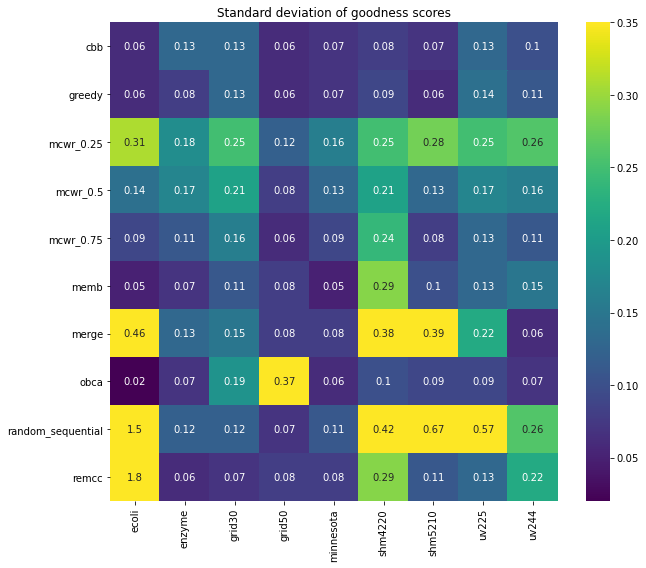

In [66]:
plt.figure(figsize=(9.5,8))
sns.heatmap(stdplt,vmax=0.35,annot=True,cmap='viridis')
plt.title('Standard deviation of goodness scores')

plt.tight_layout()
plt.savefig('std_plot.png')
plt.show()

In [21]:
stdplt=pd.read_csv('plot_data/std_plot.csv',sep=',',index_col=0)

In [22]:
stdplt

,ecoli,enzyme,grid30,grid50,minnesota,shm4220,shm5210,uv225,uv244
cbb,0.06,0.13,0.13,0.06,0.07,0.08,0.07,0.13,0.10
greedy,0.06,0.08,0.13,0.06,0.07,0.09,0.06,0.14,0.11
mcwr_0.25,0.31,0.18,0.25,0.12,0.16,0.25,0.28,0.25,0.26
mcwr_0.5,0.14,0.17,0.21,0.08,0.13,0.21,0.13,0.17,0.16
mcwr_0.75,0.09,0.11,0.16,0.06,0.09,0.24,0.08,0.13,0.11
memb,0.05,0.07,0.11,0.08,0.05,0.29,0.10,0.13,0.15
merge,0.46,0.13,0.15,0.08,0.08,0.38,0.39,0.22,0.06
obca,0.02,0.07,0.19,0.37,0.06,0.10,0.09,0.09,0.07
random_sequential,1.48,0.12,0.12,0.07,0.11,0.42,0.67,0.57,0.26
remcc,1.78,0.06,0.07,0.08,0.08,0.29,0.11,0.13,0.22


In [23]:
print(stdplt.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  ecoli &  enzyme &  grid30 &  grid50 &  minnesota &  shm4220 &  shm5210 &  uv225 &  uv244 \\
\midrule
cbb               &   0.06 &    0.13 &    0.13 &    0.06 &       0.07 &     0.08 &     0.07 &   0.13 &   0.10 \\
greedy            &   0.06 &    0.08 &    0.13 &    0.06 &       0.07 &     0.09 &     0.06 &   0.14 &   0.11 \\
mcwr\_0.25         &   0.31 &    0.18 &    0.25 &    0.12 &       0.16 &     0.25 &     0.28 &   0.25 &   0.26 \\
mcwr\_0.5          &   0.14 &    0.17 &    0.21 &    0.08 &       0.13 &     0.21 &     0.13 &   0.17 &   0.16 \\
mcwr\_0.75         &   0.09 &    0.11 &    0.16 &    0.06 &       0.09 &     0.24 &     0.08 &   0.13 &   0.11 \\
memb              &   0.05 &    0.07 &    0.11 &    0.08 &       0.05 &     0.29 &     0.10 &   0.13 &   0.15 \\
merge             &   0.46 &    0.13 &    0.15 &    0.08 &       0.08 &     0.38 &     0.39 &   0.22 &   0.06 \\
obca              &   0.02 &    0.07 &    0.19 &    0.37 &    

In [107]:
stdplotdf=pd.DataFrame(stds_toplot,index=algortihms_,columns=networks_)
print(stdplotdf)

                      ecoli    enzyme    grid30    grid50  minnesota  \
cbb                0.061338  0.125546  0.127412  0.061290   0.066873   
greedy             0.055351  0.082406  0.126804  0.063964   0.066449   
mcwr_0.25          0.306129  0.180659  0.251339  0.118347   0.164168   
mcwr_0.5           0.143134  0.169345  0.210789  0.078231   0.129856   
mcwr_0.75          0.094125  0.110113  0.155581  0.058728   0.087745   
memb               0.053113  0.070892  0.107926  0.078392   0.053119   
merge              0.462170  0.131173  0.146409  0.078660   0.078173   
obca               0.023013  0.074455  0.186000  0.370691   0.057917   
random_sequential  1.478026  0.123363  0.118894  0.069069   0.113151   
remcc              1.778953  0.061859  0.070601  0.079769   0.082898   

                    shm4220   shm5210     uv225     uv244  
cbb                0.081779  0.066926  0.128388  0.104211  
greedy             0.089286  0.060202  0.136767  0.106818  
mcwr_0.25          0.254811

In [109]:
stdplotdf.to_csv('std_plot.csv',sep=',',float_format='%.2f')

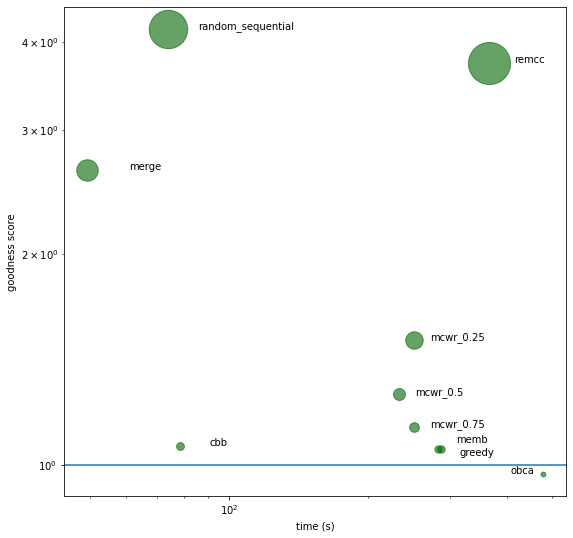

In [152]:
plt.figure(figsize=(9,9))
for index,alg in enumerate(a_ecoli):
    
    plt.scatter([extimes['ecoli'][alg]],[mean_ecoli[index]+1],label=alg,
                c='darkgreen',s=std_ecoli[index]*1000,alpha=0.6)
    
    plt.text(extimes['ecoli'][alg]+10+1.01**(extimes['ecoli'][alg])+x_offset[alg],
             mean_ecoli[index]+1+y_offset[alg],alg)
    
# plt.legend(bbox_to_anchor=(1.2,1.2))
plt.xlabel('time (s)')
plt.ylabel('goodness score')
plt.axhline(1)
plt.xscale("log")
plt.yscale('log')
# plt.xlim(10,700)


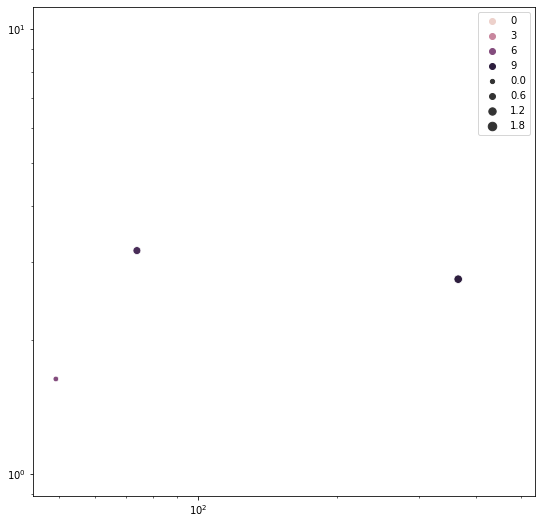

In [48]:
plt.figure(figsize=(9,9))
sns.scatterplot([extimes['ecoli'][alg] for alg in a_ecoli],mean_ecoli,
                hue=range(len(a_ecoli)),size=std_ecoli)
plt.xscale('log')
plt.yscale('log')

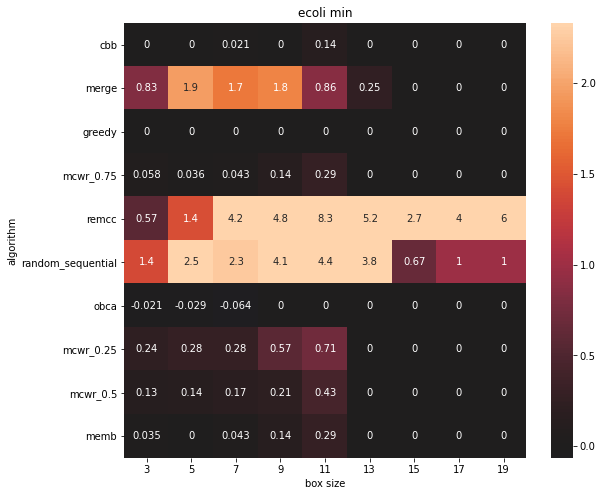

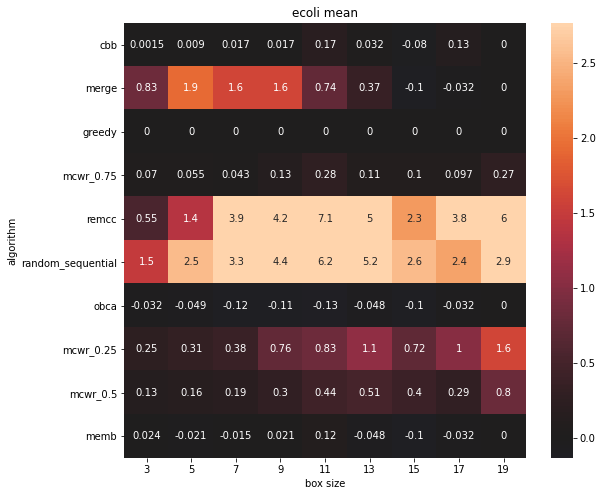

0

In [128]:
plot_func('ecoli','min',10,np.min)
plot_func('ecoli','mean',10,np.mean)
# plot_func('ecoli','std',10,np.std)

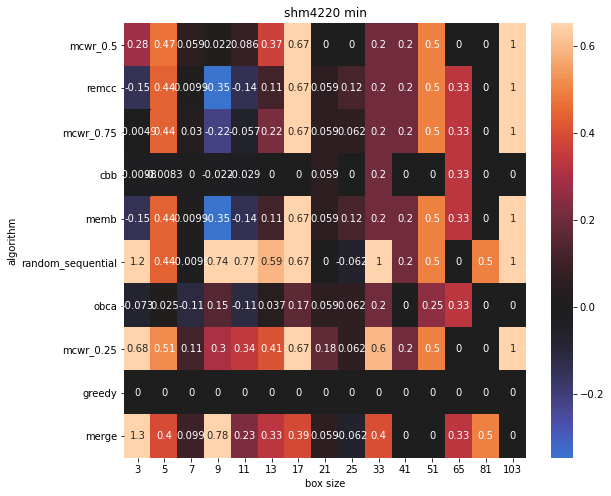

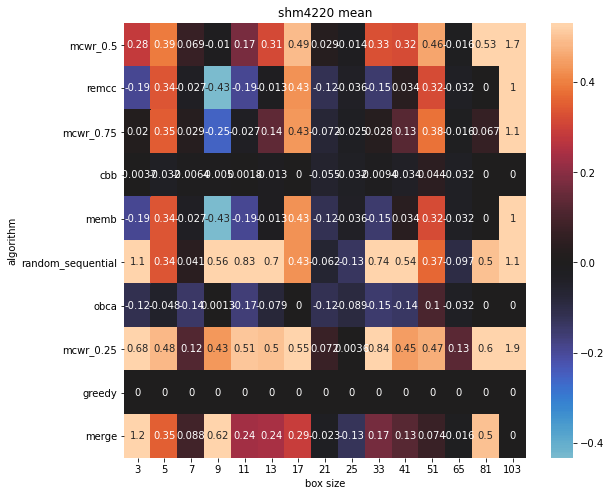

0

In [129]:
plot_func('shm4220','min',10,np.min)
plot_func('shm4220','mean',10,np.mean)
# plot_func('shm4220','std',10,np.std)

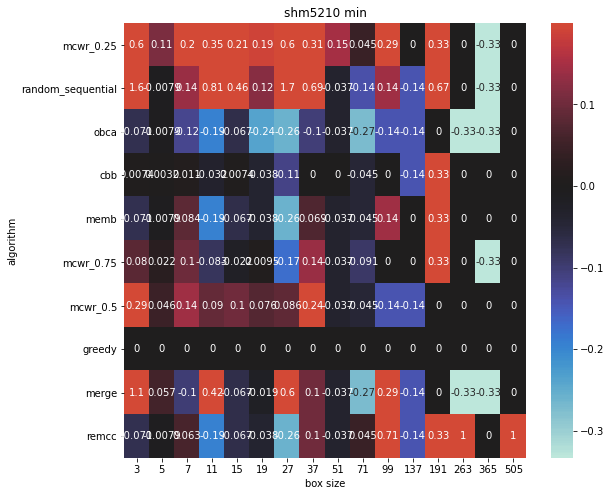

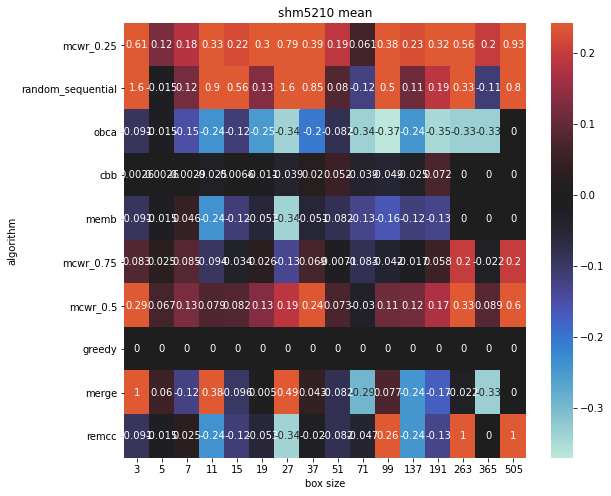

0

In [130]:
plot_func('shm5210','min',10,np.min)
plot_func('shm5210','mean',10,np.mean)

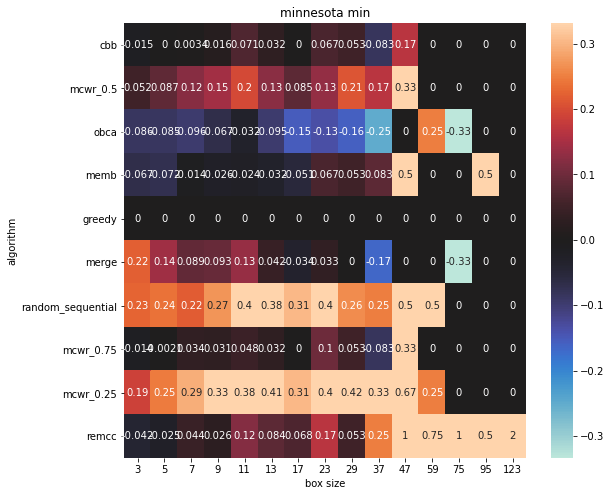

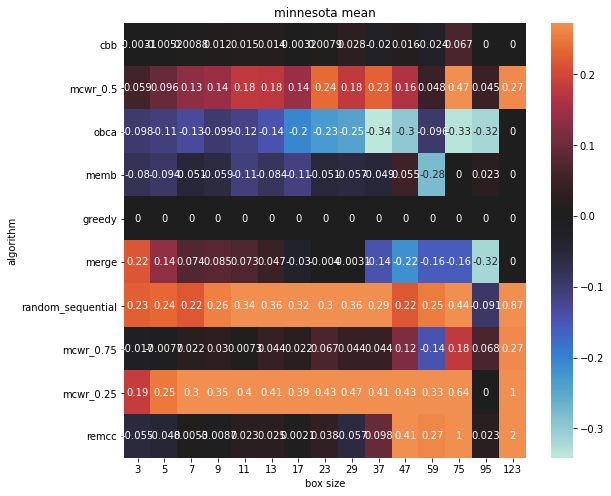

0

In [131]:
plot_func('minnesota','min',10,np.min)
plot_func('minnesota','mean',10,np.mean)

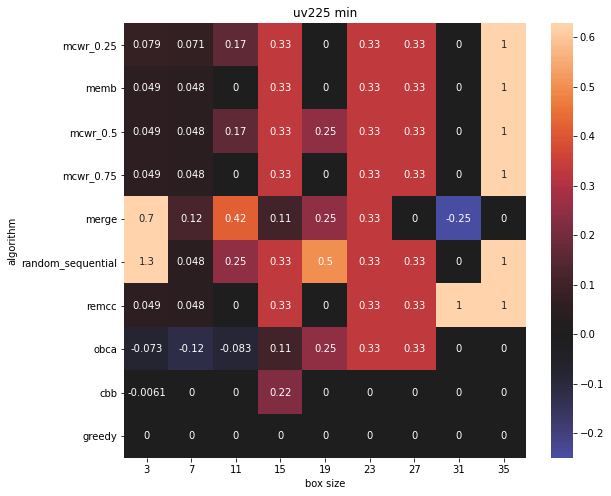

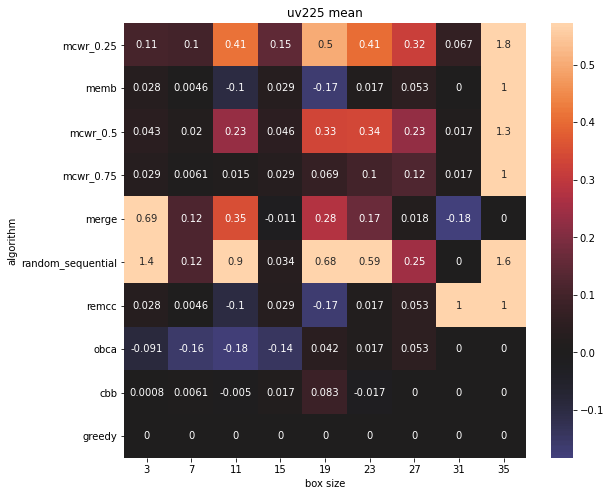

0

In [132]:
plot_func('uv225','min',10,np.min)
plot_func('uv225','mean',10,np.mean)

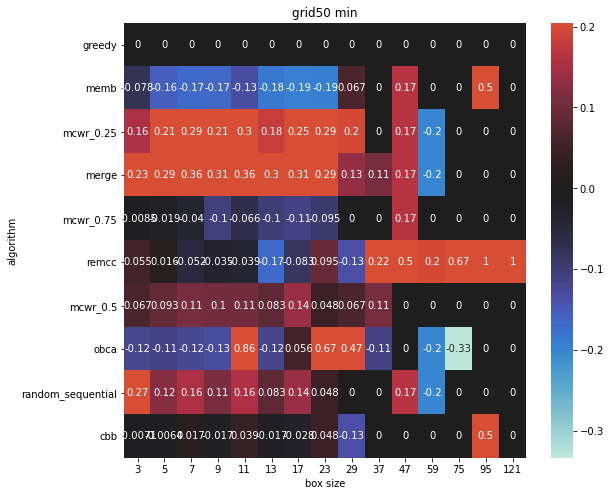

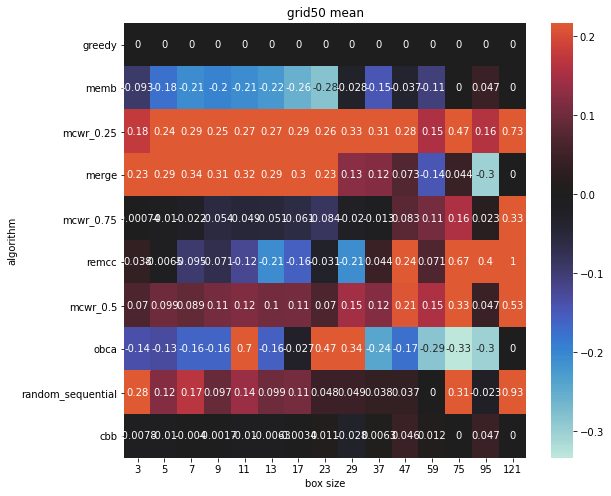

0

In [133]:
plot_func('grid50','min',10,np.min)
plot_func('grid50','mean',10,np.mean)

In [41]:
import matplotlib.pyplot as plt

In [77]:
import seaborn as sns

In [100]:
import copy

In [78]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

In [127]:
def plot_func(net,title,noalg,func=0):
    
    # determine box sizes for which we have data from all algorithms
    
    valid_sizes=[]
    keys=[]
    
    for k in nb_data[net].keys():
        
        if len(nb_data[net][k].keys())==noalg: # fuzzy, merge do not count
            valid_sizes.append(k)
        else:
            continue
            
        for alg in nb_data[net][k].keys():
            if alg!='fuzzy' and not alg in keys:
                keys.append(alg)

    results=np.zeros((len(keys),len(valid_sizes)),float)
    
    for index,key in enumerate(keys):
        for sindex,size in enumerate(valid_sizes):
        
            results[index,sindex]=func(nb_data[net][size][key])
    
        if key=='greedy':
            bench=copy.copy(results[index,:])
            
    scale=copy.copy(np.std(results,axis=0))
    
    for i in range(len(keys)):
        
        results[i,:]=(results[i,:]-bench)
    
    for i in range(len(keys)):
        
        results[i,:]=(results[i,:]/bench)
    
    plt.figure(figsize=(9,8))
    sns.heatmap(results,center=0,annot=True,vmin=np.amin(results),vmax=np.mean(results)*3,xticklabels=valid_sizes,yticklabels=keys)
    plt.xlabel('box size')
    plt.ylabel('algorithm')
    plt.title(net+' '+title)
    plt.show()
    
    return 0

In [68]:
a-np.mean(a,axis=1)

array([[ 0.5, -1. ],
       [ 0.5,  0. ]])

In [134]:
aaa=1
bbb=aaa
aaa=2
print(aaa)
print(bbb)

2
1
